In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

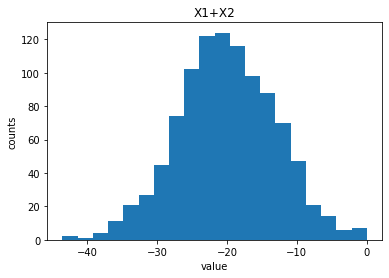

mean: -20.078828685871475
std: 6.980160900415828
Variance: 48.7226461956939


In [42]:
## PROBLEM 1
x1 = np.random.normal(-10, 5, 1000)
x2 = np.random.normal(-10, 5, 1000)
plt.hist(x1+x2, bins=20)
plt.title("X1+X2")
plt.xlabel("value")
plt.ylabel("counts")
plt.show()
print(f"mean: {(x1+x2).mean()}")
print(f"std: {(x1+x2).std()}")
print(f"Variance: {(x1+x2).std()**2}")

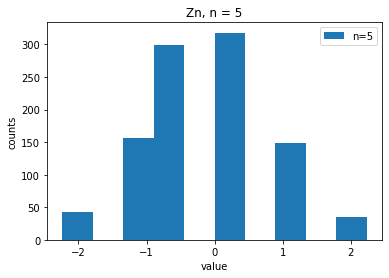

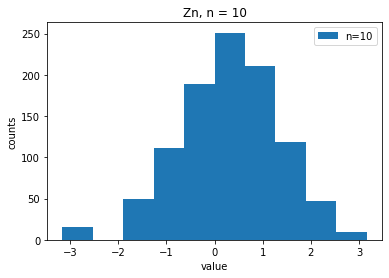

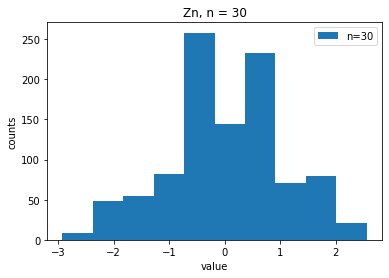

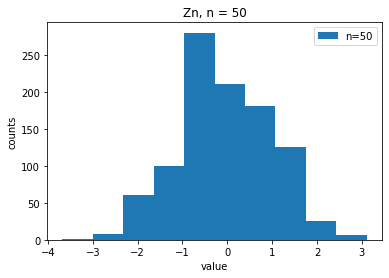

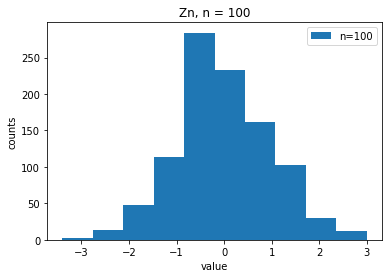

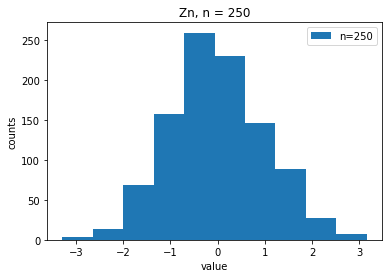

In [43]:
# PROBLEM2
bernoulli = lambda: 1 if np.random.random() >= 0.5 else -1
Zn = lambda n: sum([bernoulli() for _ in range(n)])/(n**(1/2))
def sampleZn(n, num=1000):
    return [Zn(n) for _ in range(num)]

ns = (5, 10, 30, 50, 100, 250)
for n in ns:
    plt.hist(sampleZn(n), label=f"n={n}")
    plt.title(f"Zn, n = {n}")
    plt.xlabel("value")
    plt.ylabel("counts")
    plt.legend()
    plt.show()




In [44]:
# PROBLEM 3
x = np.random.normal(0, 5, 25000)
# mean calculation
m = x.sum() / x.size
# variance calculation
sig_sq = ((x-m)**2).sum()/(x.size-1) 
print(f"mean estimate: {m}")
print(f"variance estimate: {sig_sq}")

mean estimate: 0.032057368957366626
variance estimate: 24.978803434805997


In [45]:
# PROBLEM 4
x, y = np.random.multivariate_normal((-5,5), ((20, .8),(.8, 30)), 10000).T
x_mean = x.sum() / 10000
y_mean = y.sum() / 10000
cov = (((x - x_mean) * ( y - y_mean)).sum())/(10000-1)
sigx = ((x - x_mean)**2).sum()/(9999)
sigy = ((y - y_mean)**2).sum()/(9999)

print(f"mean: {[x_mean, y_mean]}")
print(f"covariance matrix: {[[sigx, cov], [cov, sigy]]}")


mean: [-5.099571284085823, 5.1261501763059005]
covariance matrix: [[20.256714263705348, 0.9398186125071366], [0.9398186125071366, 30.40407156000308]]


Number of patients: 451
Number of features: 280

Column 1 Mean: 46.4079822616408
Column 2 Mean: 0.5521064301552107
Column 3 Mean: 166.13525498891352
Column 4 Mean: 68.14412416851441

Column 1: Age - values fit typical human ages w mean around 46 years old
Column 2: Male/Female - binary - 1/0 with roughly 50/50 split - matches male/female distribution
Column 3: Weight - floats very closely around mean of ~166 with notable outliers, matches expectation for adult weight
Column 4: Resting Heart Rate - average of ~68 fits average of between 60 and 100 average for healthy adults with notable outliers

Are there missing values? True
Are there still missing values? False
0       8.0
1       6.0
2      10.0
3       1.0
4       7.0
       ... 
447     1.0
448    10.0
449     2.0
450     1.0
451     1.0
Name: 279, Length: 452, dtype: float64
[-1.02908877e-02  2.66880942e-01 -5.29842931e-03  2.42156353e-02
  5.43310100e-02 -1.11165959e-02 -6.14369179e-03 -2.04483669e-02
  3.84730942e-03  1.6358498

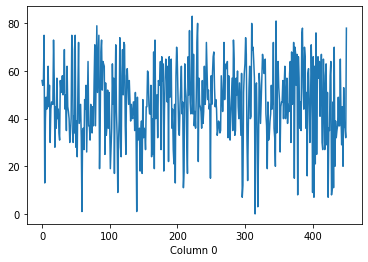

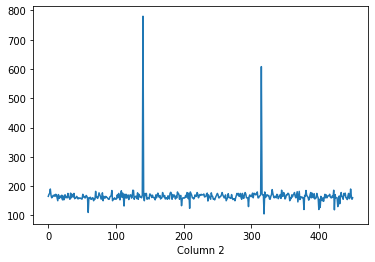

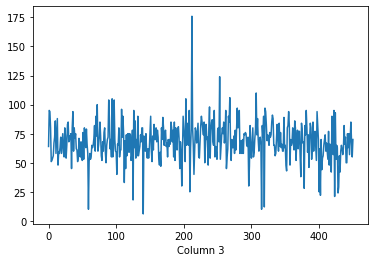

In [62]:
# PROBLEM 5
## Part a
df = pd.read_csv('PatientData.csv')
print(f"Number of patients: {str(len(df))}") # num rows
print(f"Number of features: {str(len(df.columns))}\n") # num columns
print(f'Column 1 Mean: {df.mean()[0]}')
print(f'Column 2 Mean: {df.mean()[1]}')
print(f'Column 3 Mean: {df.mean()[2]}')
print(f'Column 4 Mean: {df.mean()[3]}\n')

## Part b
# TODO: add visuals for each column and explain how conclusion was drawn
plt.figure(0)
plt.plot(df.iloc[:,0])
plt.xlabel('Column 0')
plt.figure(1)
plt.plot(df.iloc[:,2])
plt.xlabel('Column 2')
plt.figure(2)
plt.plot(df.iloc[:,3])
plt.xlabel('Column 3')
print("Column 1: Age - values fit typical human ages w mean around 46 years old")
print("Column 2: Male/Female - binary - 1/0 with roughly 50/50 split - matches male/female distribution")
print("Column 3: Weight - floats very closely around mean of ~166 with notable outliers, matches expectation for adult weight")
print("Column 4: Resting Heart Rate - average of ~68 fits average of between 60 and 100 average for healthy adults with notable outliers\n")

## Part c
df2 = pd.read_csv('PatientData.csv', header=None, dtype=np.float64, na_values='?')
print("Are there missing values? " + str(df2.isnull().values.any()))

df3 = df2.fillna(df.mean(axis=1)) # replace na values with mean for each column
print("Are there still missing values? " + str(df3.isnull().values.any()))

## Part d
# We can evaluate feature importance by fitting a regression model and comparing feature weights
y = df3.iloc[:,-1]
print(y)
x = df3.iloc[:,:-1]
regr = linear_model.LinearRegression()
regr.fit(x, y)
# evaluate coefficients
coeffs = regr.coef_